In [8]:
import requests
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import json
import pickle

In [3]:
api_url = "http://127.0.0.1:5000/api/v1.0/demographic_data_2022_budget"

response = requests.get(api_url)

demographic_data = response.json()

demographic_df = pd.DataFrame(demographic_data)

demographic_df.head()


,2022 Budget,Arab,Average total income in 2020 among recipients ($),Black,Chinese,Filipino,Japanese,Korean,Latin American,Median total income in 2020 among recipients ($),Multiple visible minorities,Not a visible minority,Population density per square kilometre,South Asian,Southeast Asian,"Visible minority, n.i.e.",Ward,West Asian,_id
0,1137.0,720,69500,8260,5635,3565,635,705,2225,44000,2280,69280,6531.2,12290,715,920,Beaches-East York,1260,65e41be6dbe3b19f2b27ec78
1,8957.0,660,55550,7100,5525,3150,615,835,6130,40400,2195,69520,8769.1,4820,2450,1215,Davenport,525,65e41be6dbe3b19f2b27ec79
2,1535.0,1550,113600,3835,12420,3510,525,1590,2150,47600,1760,53610,3386.0,13410,615,750,Don Valley West,5305,65e41be6dbe3b19f2b27ec7c
3,48033.2,2825,59750,12005,14410,5810,920,2620,3880,40800,2780,49790,20546.5,16090,2515,930,Toronto Centre,2360,65e41be6dbe3b19f2b27ec8a
4,12145.0,1690,55050,2865,29655,7590,900,11555,2285,37200,2590,33910,5984.4,8865,1540,815,Willowdale,12865,65e41be6dbe3b19f2b27ec8e


C:\Users\jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

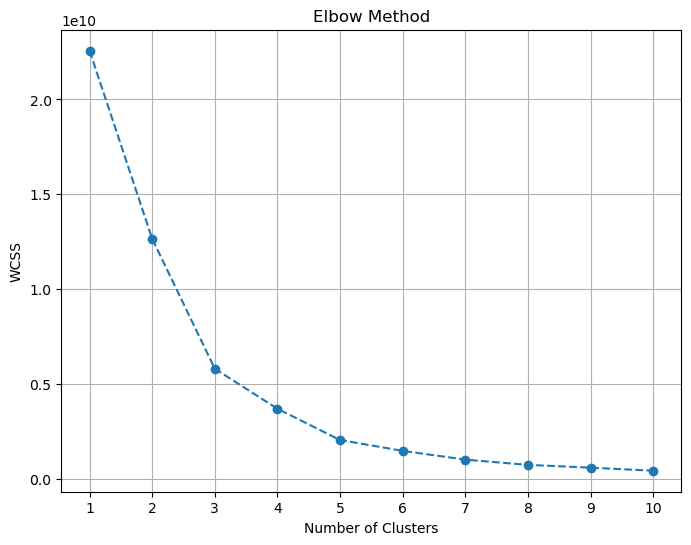

In [4]:
# Extracting relevant features
features = ['Average total income in 2020 among recipients ($)', 
            'Median total income in 2020 among recipients ($)', 
            '2022 Budget',
            'Population density per square kilometre']
elbow_X = demographic_df[features].values 

# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(elbow_X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.savefig("Graphs/Demographic_Elbow.png", bbox_inches='tight')
plt.show()


In [9]:
# Save elbow method data into pickle
elbow_data = {
    'num_clusters': range(1, 11),
    'wcss': wcss 
}
with open('trained_models/elbow_method_data.pkl', 'wb') as f:
    pickle.dump(elbow_data, f)

C:\Users\jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


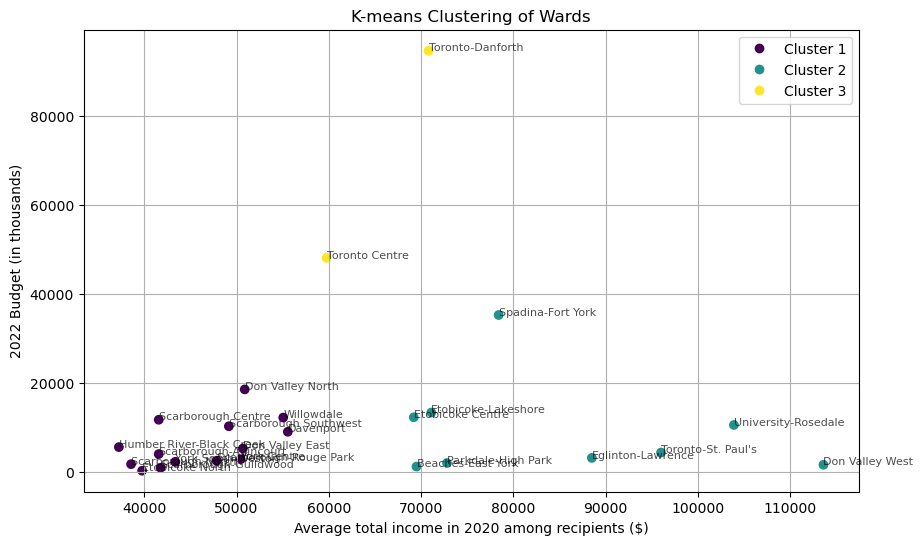

In [6]:
# Select relevant features for clustering
features = ['Average total income in 2020 among recipients ($)', 
            'Median total income in 2020 among recipients ($)', 
            '2022 Budget',
            'Population density per square kilometre']
X = demographic_df[features].values 
    
# Number of clusters
K = 3

# K-means clustering
kmeans = KMeans(n_clusters=K)
kmeans.fit(X)
labels = kmeans.labels_

demographic_df["Cluster"] = labels

plt.figure(figsize=(10, 6))
scatter = plt.scatter(demographic_df["Average total income in 2020 among recipients ($)"], demographic_df["2022 Budget"], c=labels, cmap='viridis')
plt.title('K-means Clustering of Wards')
plt.xlabel('Average total income in 2020 among recipients ($)')
plt.ylabel('2022 Budget (in thousands)')
plt.grid(True)

# Create custom legend
legend_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

# Annotate wards
for i, ward in enumerate(demographic_df["Ward"]):
    plt.annotate(ward, (demographic_df["Average total income in 2020 among recipients ($)"][i], demographic_df["2022 Budget"][i]), fontsize=8, alpha=0.7)

plt.savefig("Graphs/Demographic_clustering.png", bbox_inches='tight')

plt.show()






In [11]:
# Save to Pickle
with open('trained_models/K-means_clustering.pkl', 'wb') as f:
    pickle.dump(kmeans, f)